# ***Title:-Fake News Detection Using Machine Learning***

# ***Problem Statement***

Fake news has become a significant issue, especially on social media and online news platforms. The goal of this project is to develop a machine learning model that can automatically classify news articles as fake or real based on textual content. By Natural Language Processing (NLP it helps computers understand human language) and machine learning algorithms, the system aims to detect and prevent the spread of misinformation.

# ***About Dataset***

● Features: The dataset contains four columns: Unnamed: 0 (index), title (news
headline), text (news content), and label (indicating whether the news is fake or
real).

● Target Variable: label (0 = Fake News, 1 = Real News).

# ***Step 1: Load the Dataset***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


#***Step 2: Descriptive statistics***

In [ ]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
title,object
text,object
label,int64


In [ ]:
df.shape

(72134, 4)

#***Step 3: Cleaning The Data***

In [ ]:
#to check null values
df.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [ ]:
#replacing null values with mode
df['title'].fillna(df['title'].mode()[0], inplace=True)
df['text'].fillna(df['text'].mode()[0], inplace=True)

<ipython-input-8-53a42ef65478>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna(df['title'].mode()[0], inplace=True)
<ipython-input-8-53a42ef65478>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.isnull().sum()

,0
title,0
text,0
label,0


#***Step 4: Data Visualaization***

<ipython-input-11-c4ec3d9cce65>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1.index, y=df1.values, palette='coolwarm')


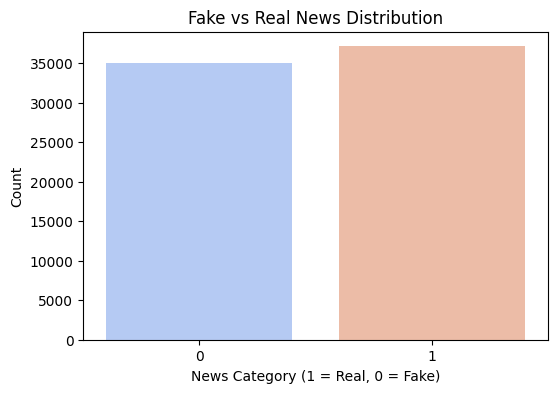

In [ ]:
#bar plot of fake vs real news distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Count of Fake (0) and Real (1) News
df1=df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=df1.index, y=df1.values, palette='coolwarm')
plt.xlabel("News Category (1 = Real, 0 = Fake)")
plt.ylabel("Count")
plt.title("Fake vs Real News Distribution")
plt.show()

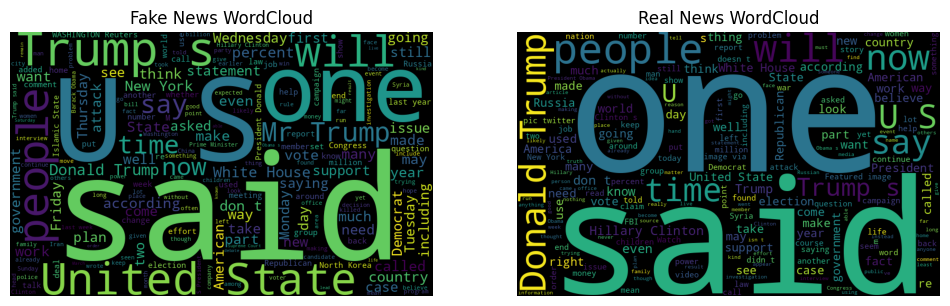

In [ ]:
#wordcloud distribution

from wordcloud import WordCloud

fake_text = " ".join(df[df["label"] == 0]["text"])  # Fake News
real_text = " ".join(df[df["label"] == 1]["text"])  # Real News

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=500).generate(fake_text))
plt.title("Fake News WordCloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=500).generate(real_text))
plt.title("Real News WordCloud")
plt.axis("off")

plt.show()

# ***Step-5-Data Preprocessing***

##Convert Text to Lowercase & Remove Punctuation

In [ ]:
# Re:-Regular Expressions
import re

def clean_text(text):
    text = text.lower()  #Convert to lowercase
    text = re.sub(r'\W+',' ',text)  #Remove punctuation & special characters
    return text                       #(\W means anything that is NOT a letter, digit, or underscore).

df['text'] = df['text'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

##Remove Stopwords & Tokenization

In [ ]:
#natural language processing library.

import nltk
from nltk.corpus import stopwords #Contains a list of common words (e.g., "the", "is", "and") that do not add much meaning.
from nltk.tokenize import word_tokenize #Splits text into individual words.
import string  #A list of punctuation marks (e.g., .,!?;)

#download necessary datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))#retrieves a predefined list of stopwords (common words like "the", "is", "and") from NLTK.
print(stopwords)
def remove_stopwords(text):
    if isinstance(text, str):  #Ensure text is a string before processing
        words = word_tokenize(text.lower())  #Lowercase text
        words = [word for word in words if word not in stop_words and word not in string.punctuation]  #Remove stopwords & punctuation
        return " ".join(words)
    return text  #Return as-is if not a string (avoids errors)

#Apply function safely
df = df.dropna(subset=['text', 'title'])  #Remove missing values
df['text'] = df['text'].apply(remove_stopwords)
df['title'] = df['title'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>


## Apply TF-IDF Vectorization (Term Frequency - Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X = vectorizer.fit_transform(df['text'])

# Convert labels to binary (0 = fake, 1 = real)
y = df['label']

In [ ]:
y

,label
0,1
1,1
2,1
3,0
4,1
...,...
72129,0
72130,1
72131,0
72132,0


# ***Step 7: Model Selection & Training***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train Multiple Machine Learning Models

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Naïve Bayes Model
nb_model = MultinomialNB() # (MultinomialNB) specifically for text classification
nb_model.fit(X_train, y_train)

# Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# ***Step 8: Model Evaluation***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

print("Naïve Bayes Performance:")
evaluate_model(nb_model, X_test, y_test)

print("\nLogistic Regression Performance:")
evaluate_model(lr_model, X_test, y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_model, X_test, y_test)


Naïve Bayes Performance:
Accuracy: 0.8494489498856311
Precision: 0.8360655737704918
Recall: 0.8757154538021259
F1 Score: 0.8554313099041534

Logistic Regression Performance:
Accuracy: 0.9442711582449573
Precision: 0.9375837128315028
Recall: 0.9539384028345598
F1 Score: 0.9456903539583896

Random Forest Performance:
Accuracy: 0.9523809523809523
Precision: 0.9395902181097158
Recall: 0.9686563096211501
F1 Score: 0.9539018989465209


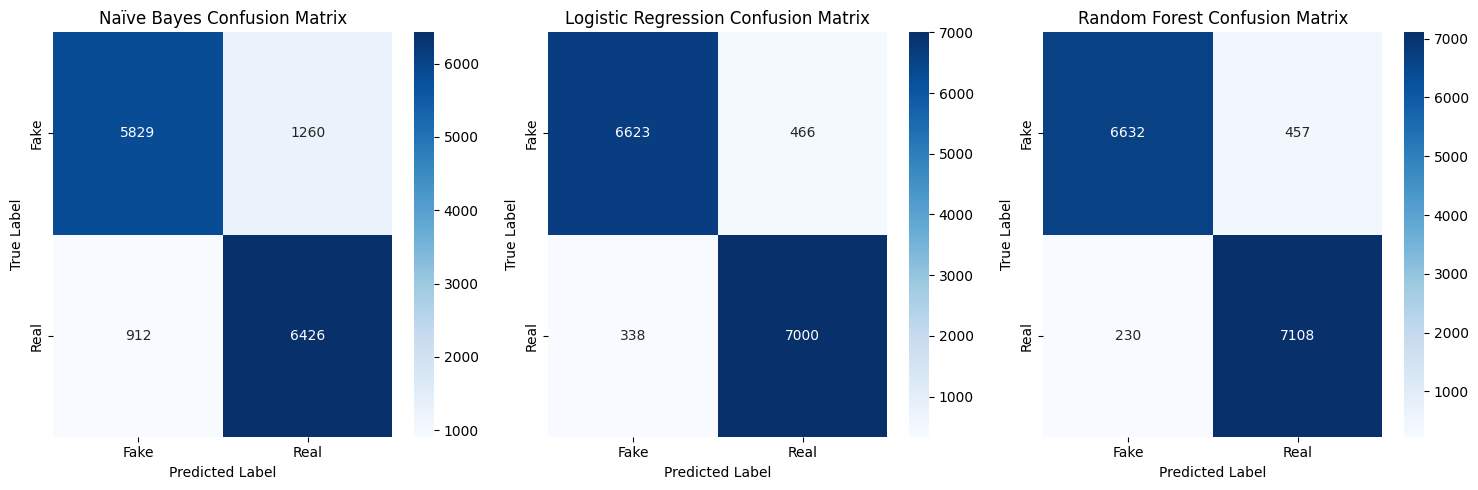

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of models
models = [nb_model, lr_model, rf_model]
titles = ["Naïve Bayes", "Logistic Regression", "Random Forest"]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{titles[i]} Confusion Matrix")

plt.tight_layout()
plt.show()

In [ ]:
# Save cleaned dataset to CSV
df.to_csv("cleaned_fake_news.csv", index=False)

print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
